In [1]:
# 🔍 Verify API Keys Setup
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

groq_key = os.getenv("GROQ_API_KEY")
elevenlabs_key = os.getenv("ELEVENLABS_API_KEY")
langchain_key = os.getenv("LANGCHAIN_API_KEY")

# Check Groq API Key (used for LLM)
if groq_key:
    print("✅ Groq API Key: Loaded")
    print(f"   Key starts with: {groq_key[:10]}...")
else:
    print("❌ Groq API Key: MISSING")
    print("   → Get it from: https://console.groq.com/keys")
    print("   → Add to .env: GROQ_API_KEY=your_key_here")
print()

# Check Eleven Labs API Key
if elevenlabs_key:
    print("✅ Eleven Labs API Key: Loaded")
    print(f"   Key starts with: {elevenlabs_key[:10]}...")
    print("   → Voice features will be available")
else:
    print("⚠️  Eleven Labs API Key: Not set (Optional)")
    print("   → Voice features will be disabled")
    print("   → Get it from: https://elevenlabs.io/")
    print("   → Add to .env: ELEVENLABS_API_KEY=your_key_here")
print()

if langchain_key:
    print("✅ LangChain API Key: Loaded")
    print(f"   Key starts with: {langchain_key[:10]}...")
else:
    print("❌ LangChain API Key: MISSING")
    print("   → Get it from: https://www.langchain.com/")
    print("   → Add to .env: LANGCHAIN_API_KEY=your_key_here")



✅ Groq API Key: Loaded
   Key starts with: gsk_9Y07Ns...

✅ Eleven Labs API Key: Loaded
   Key starts with: sk_239aa1a...
   → Voice features will be available

✅ LangChain API Key: Loaded
   Key starts with: lsv2_pt_93...


In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import (
PyPDFLoader
)
from langchain_groq import ChatGroq

/Users/nischitha/Documents/Agentic-RAG/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
### PypdfLoader
print("PyPdfloader")

try:
    pypdf_loader=PyPDFLoader("data/pdf/Nischitha.D.pdf")
    pypdf_docs=pypdf_loader.load()
    print(pypdf_docs)
    print(f"  Loaded {len(pypdf_docs)} pages")
    print(f"  Page 1 content: {pypdf_docs[1].page_content[:100]}...")
    print(f"  Metadata: {pypdf_docs[1].metadata}")

except Exception as e:
    print(f"Error : {e}")

PyPdfloader
[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-11-21T22:58:52-08:00', 'title': "John Doe's CV", 'author': 'John Doe', 'moddate': '2025-11-21T22:58:52-08:00', 'source': 'data/pdf/Nischitha.D.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Nischitha.D \nBangalore | nischithaengineer123@gmail.com  | 9380665366 | \nhttps://www.linkedin.com/in/nischithad-aiengineer  | https://github.com/nischithaengineer \nProfessional Summary \nAI Engineer with six months of experience in Natural Language Processing, FastAPI and Graph Database. A \nfive-star Python coder on HackerRank, skilled in fine-tuning large language models and Retrieval-Augmented \nGeneration. \nAchievement \nMachineHack Sequence Classification Hackathon \n• Secured 13th place in the MachineHack Sequence Classification Hackathon, where I fine-tuned Google BERT for \nmulti-class classification. \nEducation \nDon Bosco Institute of Technology , BE in Compute

In [4]:
text_splitter = RecursiveCharacterTextSplitter( #splits the text into smaller chunks
    chunk_size=1000, chunk_overlap=100
)

pdf_splits = text_splitter.split_documents(pypdf_docs)

## Add alll these text to vectordb
# HuggingFace embeddings (no API key needed); Groq is used for the LLM only
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vectorstore=FAISS.from_documents( #creates a vector database
    documents=pdf_splits,
    embedding=embedding
)


retriever=vectorstore.as_retriever()

/var/folders/kq/hgybz0d90wg4j52dl5bx35x80000gp/T/ipykernel_1427/873825663.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [5]:
print(pdf_splits)

[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-11-21T22:58:52-08:00', 'title': "John Doe's CV", 'author': 'John Doe', 'moddate': '2025-11-21T22:58:52-08:00', 'source': 'data/pdf/Nischitha.D.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Nischitha.D \nBangalore | nischithaengineer123@gmail.com  | 9380665366 | \nhttps://www.linkedin.com/in/nischithad-aiengineer  | https://github.com/nischithaengineer \nProfessional Summary \nAI Engineer with six months of experience in Natural Language Processing, FastAPI and Graph Database. A \nfive-star Python coder on HackerRank, skilled in fine-tuning large language models and Retrieval-Augmented \nGeneration. \nAchievement \nMachineHack Sequence Classification Hackathon \n• Secured 13th place in the MachineHack Sequence Classification Hackathon, where I fine-tuned Google BERT for \nmulti-class classification. \nEducation \nDon Bosco Institute of Technology , BE in Computer Science Oc

In [6]:
print(vectorstore)

In [7]:
# Retriever alone returns DOCUMENT CHUNKS (raw text), not an answer.
# To get a direct answer (e.g. just the phone number), use RAG: retriever + LLM.

from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq

question = "what is the linkedln profile of nischitha"
docs = retriever.invoke(question)
context = "\n\n".join(doc.page_content for doc in docs)

prompt = PromptTemplate(
    template="Answer the question using ONLY the context below. Give a very short, direct answer (e.g. just the number or one sentence).\n\nContext:\n{context}\n\nQuestion: {question}\n\nAnswer:",
    input_variables=["context", "question"],
)
llm = ChatGroq(model="openai/gpt-oss-120b")
answer = (prompt | llm | StrOutputParser()).invoke({"context": context, "question": question})
print(answer)

https://www.linkedin.com/in/nischithad-aiengineer


In [8]:
# Optional: see the raw documents the retriever returned (before the LLM turned them into an answer)
print("Retrieved chunks (raw):", len(docs))
for i, doc in enumerate(docs[:2]):
    print(f"\n--- Chunk {i+1} (first 200 chars) ---\n{doc.page_content[:200]}...")

Retrieved chunks (raw): 4

--- Chunk 1 (first 200 chars) ---
Nischitha.D 
Bangalore | nischithaengineer123@gmail.com  | 9380665366 | 
https://www.linkedin.com/in/nischithad-aiengineer  | https://github.com/nischithaengineer 
Professional Summary 
AI Engineer wi...

--- Chunk 2 (first 200 chars) ---
scalable API performance and Build Microsoft Azure Logic App to automate email delivery of OTPs for 
password reset. 
• Developed a web scraper for US news channels by using BeautifulSoup,SpaCy and ne...


In [9]:

### Retriever To Retriever Tools to integrate with the agent(LLM)
from langchain_core.tools.retriever import create_retriever_tool
retriever_tool_resume=create_retriever_tool(
    retriever,
    "retriever_vector_db_resume", #name of the tool
    "Search and run information about candidate" #description of the tool
)

In [10]:
tools=[retriever_tool_resume]

### LangGraph Workflow

In [11]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [12]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")

In [13]:
def agent(state): #agent node 
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="openai/gpt-oss-120b")
    model = model.bind_tools(tools)  # pass a list of tools
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [14]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [15]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="openai/gpt-oss-120b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [16]:
def generate(state):
    """
    EXECUTION PHASE: Agent EXECUTES the answer generation
 
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE (EXECUTION PHASE)---")
    messages = state["messages"]
    
    # Find the most recent HumanMessage (the current question)
    question = None
    for msg in reversed(messages):
        if hasattr(msg, 'type') and msg.type == 'human':
            question = msg.content
            break
        elif isinstance(msg, HumanMessage):
            question = msg.content
            break
    
    # Fallback to first message if no HumanMessage found
    if question is None:
        question = messages[0].content if hasattr(messages[0], 'content') else str(messages[0])
    
    print(f"🎯 Answering question: {question}")
    
    last_message = messages[-1]
    docs = last_message.content

    # Prompt - RAG prompt template (equivalent to hub.pull("rlm/rag-prompt"))
    prompt = PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.

Question: {question}

Context: {context}

Answer:""",
        input_variables=["question", "context"]
    )

    # LLM
    llm = ChatGroq(model="openai/gpt-oss-120b")

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [17]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="llama-3.3-70b-versatile")
    response = model.invoke(msg)
    return {"messages": [response]}

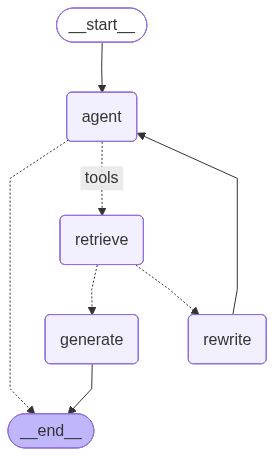

In [18]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode(tools)
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [19]:
graph.invoke({"messages":"what is the email id of nischitha"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE (EXECUTION PHASE)---
🎯 Answering question: what is the email id of nischitha


{'messages': [HumanMessage(content='what is the email id of nischitha', additional_kwargs={}, response_metadata={}, id='a86b4016-6fea-4057-9e78-daaff6a640f8'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "what is the email id of nischitha". We need to retrieve from a resume or some data source. There\'s a function retriever_vector_db_resume that can search a vector DB of resumes. Likely the user wants the email address of a person named Nischitha. We need to query. Use function.', 'tool_calls': [{'id': 'fc_68632b0f-d1dd-4e6f-81e6-8cd74864c181', 'function': {'arguments': '{"query":"Nischitha email"}', 'name': 'retriever_vector_db_resume'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 140, 'total_tokens': 243, 'completion_time': 0.22093576, 'prompt_time': 0.045713519, 'queue_time': 0.059011201, 'total_time': 0.266649279, 'completion_tokens_details': {'reasoning_tokens': 69}}, 'model_name': 'openai

### MCP Integration

In [20]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import (
PyPDFLoader
)
from langchain_groq import ChatGroq

In [21]:
### PypdfLoader
print("PyPdfloader")

try:
    pypdf_loader=PyPDFLoader("data/pdf/Nischitha.D.pdf")
    pypdf_docs=pypdf_loader.load()
    print(pypdf_docs)
    print(f"  Loaded {len(pypdf_docs)} pages")
    print(f"  Page 1 content: {pypdf_docs[1].page_content[:100]}...")
    print(f"  Metadata: {pypdf_docs[1].metadata}")

except Exception as e:
    print(f"Error : {e}")

PyPdfloader
[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-11-21T22:58:52-08:00', 'title': "John Doe's CV", 'author': 'John Doe', 'moddate': '2025-11-21T22:58:52-08:00', 'source': 'data/pdf/Nischitha.D.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Nischitha.D \nBangalore | nischithaengineer123@gmail.com  | 9380665366 | \nhttps://www.linkedin.com/in/nischithad-aiengineer  | https://github.com/nischithaengineer \nProfessional Summary \nAI Engineer with six months of experience in Natural Language Processing, FastAPI and Graph Database. A \nfive-star Python coder on HackerRank, skilled in fine-tuning large language models and Retrieval-Augmented \nGeneration. \nAchievement \nMachineHack Sequence Classification Hackathon \n• Secured 13th place in the MachineHack Sequence Classification Hackathon, where I fine-tuned Google BERT for \nmulti-class classification. \nEducation \nDon Bosco Institute of Technology , BE in Compute

In [22]:
text_splitter = RecursiveCharacterTextSplitter( #splits the text into smaller chunks
    chunk_size=1000, chunk_overlap=100
)

pdf_splits = text_splitter.split_documents(pypdf_docs)

## Add alll these text to vectordb
# HuggingFace embeddings (no API key needed); Groq is used for the LLM only
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vectorstore=FAISS.from_documents( #creates a vector database
    documents=pdf_splits,
    embedding=embedding
)


retriever=vectorstore.as_retriever()

In [23]:
print(pdf_splits)

[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-11-21T22:58:52-08:00', 'title': "John Doe's CV", 'author': 'John Doe', 'moddate': '2025-11-21T22:58:52-08:00', 'source': 'data/pdf/Nischitha.D.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Nischitha.D \nBangalore | nischithaengineer123@gmail.com  | 9380665366 | \nhttps://www.linkedin.com/in/nischithad-aiengineer  | https://github.com/nischithaengineer \nProfessional Summary \nAI Engineer with six months of experience in Natural Language Processing, FastAPI and Graph Database. A \nfive-star Python coder on HackerRank, skilled in fine-tuning large language models and Retrieval-Augmented \nGeneration. \nAchievement \nMachineHack Sequence Classification Hackathon \n• Secured 13th place in the MachineHack Sequence Classification Hackathon, where I fine-tuned Google BERT for \nmulti-class classification. \nEducation \nDon Bosco Institute of Technology , BE in Computer Science Oc

In [24]:
print(vectorstore)

In [25]:
print(retriever)

tags=['FAISS', 'HuggingFaceEmbeddings'] vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17faa3250> search_kwargs={}


In [26]:
# Retriever alone returns DOCUMENT CHUNKS (raw text), not an answer.
# To get a direct answer (e.g. just the phone number), use RAG: retriever + LLM.

from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq

question = "what is the linkedln profile of nischitha"
docs = retriever.invoke(question)
context = "\n\n".join(doc.page_content for doc in docs)

prompt = PromptTemplate(
    template="Answer the question using ONLY the context below. Give a very short, direct answer (e.g. just the number or one sentence).\n\nContext:\n{context}\n\nQuestion: {question}\n\nAnswer:",
    input_variables=["context", "question"],
)
llm = ChatGroq(model="openai/gpt-oss-120b")
answer = (prompt | llm | StrOutputParser()).invoke({"context": context, "question": question})
print(answer)

https://www.linkedin.com/in/nischithad-aiengineer


In [27]:
# Optional: see the raw documents the retriever returned (before the LLM turned them into an answer)
print("Retrieved chunks (raw):", len(docs))
for i, doc in enumerate(docs[:2]):
    print(f"\n--- Chunk {i+1} (first 200 chars) ---\n{doc.page_content[:200]}...")

Retrieved chunks (raw): 4

--- Chunk 1 (first 200 chars) ---
Nischitha.D 
Bangalore | nischithaengineer123@gmail.com  | 9380665366 | 
https://www.linkedin.com/in/nischithad-aiengineer  | https://github.com/nischithaengineer 
Professional Summary 
AI Engineer wi...

--- Chunk 2 (first 200 chars) ---
scalable API performance and Build Microsoft Azure Logic App to automate email delivery of OTPs for 
password reset. 
• Developed a web scraper for US news channels by using BeautifulSoup,SpaCy and ne...


In [28]:

### Retriever To Retriever Tools to integrate with the agent(LLM)
from langchain_core.tools.retriever import create_retriever_tool
retriever_tool_resume=create_retriever_tool(
    retriever,
    "retriever_vector_db_resume", #name of the tool
    "Search and run information about candidate" #description of the tool
)

In [29]:
retriever_tool_resume

Tool(name='retriever_vector_db_resume', description='Search and run information about candidate', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x30e75e480>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17faa3250>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x30e75c900>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x17faa3250>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separat

In [30]:
from langchain_mcp_adapters.client import MultiServerMCPClient

client = MultiServerMCPClient(
    {
        "playwright": {
            "transport": "stdio",
            "command": "npx",
            "args": ["@playwright/mcp@latest"]  
        },
  }

)

print("✅ Using Playwright MCP server")

✅ Using Playwright MCP server


In [31]:
# Get all tools from the MCP server
try:
    mcp_tools = await client.get_tools()
except Exception as e:
    print("MCP ERROR:", e)
    raise


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [32]:
print(f"Loaded {len(mcp_tools)} MCP tools:")
for tool in mcp_tools:
    print(f"   - {tool.name}")

Loaded 22 MCP tools:
   - browser_close
   - browser_resize
   - browser_console_messages
   - browser_handle_dialog
   - browser_evaluate
   - browser_file_upload
   - browser_fill_form
   - browser_install
   - browser_press_key
   - browser_type
   - browser_navigate
   - browser_navigate_back
   - browser_network_requests
   - browser_run_code
   - browser_take_screenshot
   - browser_snapshot
   - browser_click
   - browser_drag
   - browser_hover
   - browser_select_option
   - browser_tabs
   - browser_wait_for


In [33]:
# Fix: Make async MCP tools work with sync LangGraph workflow
import asyncio

def make_sync_compatible(tool):
    """Wrap async tool to work with sync workflows"""
    if hasattr(tool, 'coroutine') and tool.coroutine is not None:
        original_coroutine = tool.coroutine
        
        def sync_wrapper(*args, **kwargs):
            """Run async function in sync context"""
            try:
                loop = asyncio.get_event_loop()
                if loop.is_running():
                    # If loop is already running, create a new one
                    import nest_asyncio
                    nest_asyncio.apply()
            except RuntimeError:
                loop = asyncio.new_event_loop()
                asyncio.set_event_loop(loop)
            
            return loop.run_until_complete(original_coroutine(*args, **kwargs))
        
        # Replace the func with sync wrapper
        tool.func = sync_wrapper
    return tool

# Make all MCP tools sync-compatible
tools_mcp = [retriever_tool_resume] + [make_sync_compatible(t) for t in mcp_tools]

print(f"✅ Fixed {len(mcp_tools)} async browser tools to work with sync workflow")
print(f"📋 Total tools ready: {len(tools_mcp)}")


✅ Fixed 22 async browser tools to work with sync workflow
📋 Total tools ready: 23


In [34]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [35]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")

In [ ]:
def agent(state): #agent node 
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    from langchain_core.messages import SystemMessage
    print("---CALL AGENT---")
    messages = state["messages"]
    # System prompt: use retriever + browser when needed; don't refuse
    system_msg = SystemMessage(content="""You are an assistant with access to a resume database and a browser (Playwright).
1) When users ask about the candidate (e.g. email, phone, LinkedIn, skills, experience, projects), call retriever_vector_db_resume first, then answer from the retrieved context.
2) When users ask to OPEN or VISIT a URL (e.g. 'open the LinkedIn profile', 'open GitHub profile'), you MUST: first call retriever_vector_db_resume to get the URL from the resume; then when you receive the tool result with the URL (e.g. https://www.linkedin.com/... or https://github.com/...), call browser_navigate with that URL to open the page. You have browser tools (browser_navigate, browser_tabs, etc.)—use them when the user asks to open a link.
3) The resume documents are the candidate's own; answering from them is allowed. Do not refuse; use the tools.""")
    messages_with_system = [system_msg] + list(messages)
    model = ChatGroq(model="openai/gpt-oss-120b")
    model = model.bind_tools(tools_mcp)  # pass a list of tools
    response = model.invoke(messages_with_system)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [37]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [38]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="openai/gpt-oss-120b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [39]:
def generate(state):
    """
    EXECUTION PHASE: Agent EXECUTES the answer generation
 
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE (EXECUTION PHASE)---")
    messages = state["messages"]
    
    # Find the most recent HumanMessage (the current question)
    question = None
    for msg in reversed(messages):
        if hasattr(msg, 'type') and msg.type == 'human':
            question = msg.content
            break
        elif isinstance(msg, HumanMessage):
            question = msg.content
            break
    
    # Fallback to first message if no HumanMessage found
    if question is None:
        question = messages[0].content if hasattr(messages[0], 'content') else str(messages[0])
    
    print(f"🎯 Answering question: {question}")
    
    last_message = messages[-1]
    docs = last_message.content

    # Prompt - RAG prompt template (equivalent to hub.pull("rlm/rag-prompt"))
    prompt = PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.

Question: {question}

Context: {context}

Answer:""",
        input_variables=["question", "context"]
    )

    # LLM
    llm = ChatGroq(model="openai/gpt-oss-120b")

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [40]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="llama-3.3-70b-versatile")
    response = model.invoke(msg)
    return {"messages": [response]}

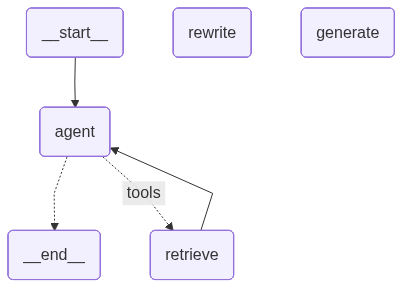

In [41]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode(tools_mcp)
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# After retrieve: go back to agent so it can use browser_navigate or respond.
workflow.add_edge("retrieve", "agent")
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [42]:
graph.invoke({"messages":"what is the email id of nischitha"})

---CALL AGENT---
---CALL AGENT---


{'messages': [HumanMessage(content='what is the email id of nischitha', additional_kwargs={}, response_metadata={}, id='af3a514d-4585-4863-a4f6-368fae39d144'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to retrieve email from resume. Use retriever_vector_db_resume with query "Nischitha email".', 'tool_calls': [{'id': 'fc_90504c7f-0635-4c86-8859-d1aae333e85e', 'function': {'arguments': '{"query":"Nischitha email"}', 'name': 'retriever_vector_db_resume'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 2018, 'total_tokens': 2075, 'completion_time': 0.127174135, 'prompt_time': 0.102704228, 'queue_time': 0.044828602, 'total_time': 0.229878363, 'completion_tokens_details': {'reasoning_tokens': 23}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_d29d1d1418', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--23ca4cf6-5280-41d3-80

In [43]:
graph.invoke({"messages":"what is the github profile of nischitha"})

---CALL AGENT---
---CALL AGENT---


{'messages': [HumanMessage(content='what is the github profile of nischitha', additional_kwargs={}, response_metadata={}, id='fce8ec11-ddab-49a0-a8a8-82b06e9e0dbd'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to retrieve from resume DB the GitHub URL. Use retriever_vector_db_resume with query "GitHub profile".', 'tool_calls': [{'id': 'fc_2ed3a7b4-5a25-41ac-b942-009d10ddbeb7', 'function': {'arguments': '{"query":"GitHub profile"}', 'name': 'retriever_vector_db_resume'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 2018, 'total_tokens': 2077, 'completion_time': 0.127594094, 'prompt_time': 0.312368907, 'queue_time': 0.045192838, 'total_time': 0.439963001, 'prompt_tokens_details': {'cached_tokens': 1792}, 'completion_tokens_details': {'reasoning_tokens': 26}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_626f3fc5e0', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': 

In [ ]:
graph.invoke({"messages":"what is the linkeld profile of nischitha"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE (EXECUTION PHASE)---
🎯 Answering question: what is the linkeldprofile of nischitha


{'messages': [HumanMessage(content='what is the linkeldprofile of nischitha', additional_kwargs={}, response_metadata={}, id='44cac429-3a62-4faf-8ea7-9ecf202bd118'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to answer about LinkedIn profile of candidate Nischitha. Must first call retriever_vector_db_resume with appropriate query.', 'tool_calls': [{'id': 'fc_92b38d87-9142-4dea-8429-e419a97525c7', 'function': {'arguments': '{"query":"Nischitha LinkedIn profile"}', 'name': 'retriever_vector_db_resume'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 1918, 'total_tokens': 1981, 'completion_time': 0.146440579, 'prompt_time': 0.013633482, 'queue_time': 0.045087357, 'total_time': 0.160074061, 'prompt_tokens_details': {'cached_tokens': 1792}, 'completion_tokens_details': {'reasoning_tokens': 27}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_8a618bed98', 'service_tier': 'on_demand', 'finish_re

In [ ]:
graph.invoke({"messages":"Can you open the github profile of nischitha"})

In [44]:
# Eval dataset: questions the agent should answer from resume or GitHub/project docs
# expected_answer: key fact that must appear in the response (we check containment)
EVAL_DATASET = [
    # Resume (candidate) questions
    {"question": "What is Nischitha's email?", "expected": "nischithaengineer123@gmail.com"},
    {"question": "What is the phone number of the candidate?", "expected": "9380665366"},
    {"question": "What is Nischitha's LinkedIn profile URL?", "expected": "linkedin.com"},
    {"question": "What is the GitHub profile of Nischitha?", "expected": "github.com/nischithaengineer"},
    {"question": "What technical skills does Nischitha have?", "expected": "Python"},
    {"question": "Where did Nischitha work?", "expected": "Alongx"},
    # Agentic Chatbot project (from GitHub retriever)
    {"question": "Tell me about the Agentic Chatbot project.", "expected": "agentic"},
    {"question": "What are the main features of the Agentic Chatbot?", "expected": "RAG"},
]

print(f"Eval dataset: {len(EVAL_DATASET)} questions")
for i, ex in enumerate(EVAL_DATASET[:4]):
    print(f"  {i+1}. {ex['question'][:50]}...")

Eval dataset: 8 questions
  1. What is Nischitha's email?...
  2. What is the phone number of the candidate?...
  3. What is Nischitha's LinkedIn profile URL?...
  4. What is the GitHub profile of Nischitha?...


## Agentic RAG Evaluation

This section measures:

- **Tool Call Accuracy**: Correct tools invoked with appropriate parameters.
- **Tool Context Relevance**: Retrieved information is relevant to the user query.
- **Context Precision & Recall**: Proportion of relevant chunks retrieved; whether all needed info was found.
- **Faithfulness (Groundedness)**: Final answer is based only on retrieved docs (no hallucinations).
- **Answer Relevance**: Final response addresses the user's original query.

In [45]:
# Test dataset: question, expected tool for resume Qs, and ground truth for scoring
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage

EVAL_DATASET = [
    {
        "question": "What is the email id of Nischitha?",
        "expected_tool": "retriever_vector_db_resume",
        "expected_answer_contains": ["nischithaengineer123@gmail.com"],
        "query_relevant_keywords": ["email", "nischitha"],
    },
    {
        "question": "What is the GitHub profile of Nischitha?",
        "expected_tool": "retriever_vector_db_resume",
        "expected_answer_contains": ["github.com/nischithaengineer"],
        "query_relevant_keywords": ["github", "profile", "nischitha"],
    },
    {
        "question": "What is the LinkedIn profile of Nischitha?",
        "expected_tool": "retriever_vector_db_resume",
        "expected_answer_contains": ["linkedin.com/in/nischithad-aiengineer"],
        "query_relevant_keywords": ["linkedin", "profile", "nischitha"],
    },
    {
        "question": "What are Nischitha's technical skills?",
        "expected_tool": "retriever_vector_db_resume",
        "expected_answer_contains": ["Python", "RAG", "FastAPI", "NLP"],
        "query_relevant_keywords": ["skills", "technical", "nischitha"],
    },
    {
        "question": "Where did Nischitha work and what was her role?",
        "expected_tool": "retriever_vector_db_resume",
        "expected_answer_contains": ["Alongx", "AI Engineer"],
        "query_relevant_keywords": ["experience", "work", "nischitha"],
    },
]


def run_agentic_rag(graph, question: str):
    """Run the compiled graph and return final state (messages)."""
    messages = [HumanMessage(content=question)] if isinstance(question, str) else question
    result = graph.invoke({"messages": messages})
    return result.get("messages", [])


def parse_run_result(messages):
    """Extract query, tool calls, retrieved context, and final answer from a run."""
    query = ""
    tool_calls_used = []  # list of {"name": str, "args": dict}
    retrieved_context = ""
    final_answer = ""

    for m in messages:
        if hasattr(m, "content"):
            content = m.content if isinstance(m.content, str) else str(m.content)
        else:
            content = ""
        if getattr(m, "type", None) == "human" or (hasattr(m, "__class__") and "Human" in m.__class__.__name__):
            if content and not content.startswith("You are"):
                query = content
        if getattr(m, "tool_calls", None):
            for tc in m.tool_calls:
                name = tc.get("name") or (tc.get("function") or {}).get("name")
                args = tc.get("args") or {}
                if not args and tc.get("function", {}).get("arguments"):
                    import json
                    try:
                        args = json.loads(tc["function"]["arguments"])
                    except Exception:
                        args = {}
                tool_calls_used.append({"name": name, "args": args})
        if getattr(m, "name", None) == "retriever_vector_db_resume" and content:
            retrieved_context = retrieved_context + "\n\n" + content if retrieved_context else content

    # Final answer = last AI (or human) message with non-empty content
    for m in reversed(messages):
        c = getattr(m, "content", "") or ""
        if not isinstance(c, str) or len((c or "").strip()) < 5:
            continue
        is_ai = getattr(m, "type", None) == "ai" or "AIMessage" in type(m).__name__
        is_human = getattr(m, "type", None) == "human" or "HumanMessage" in type(m).__name__
        if is_ai:
            final_answer = c.strip()
            break
    if not final_answer:
        for m in reversed(messages):
            c = getattr(m, "content", "") or ""
            if isinstance(c, str) and c.strip() and len(c.strip()) > 5 and ("HumanMessage" in type(m).__name__):
                final_answer = c.strip()
                break

    return {
        "query": query,
        "tool_calls": tool_calls_used,
        "retrieved_context": (retrieved_context or "").strip(),
        "final_answer": final_answer,
    }

In [46]:
# Evaluators: Tool Call Accuracy, Tool Context Relevance, Context Precision/Recall, Faithfulness, Answer Relevance
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

_judge_llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)


def eval_tool_call_accuracy(expected_tool: str, parsed: dict) -> float:
    """1.0 if correct tool was used with reasonable params; 0.5 if wrong params; 0.0 if wrong/missing tool."""
    used = parsed.get("tool_calls") or []
    if not used:
        return 0.0
    names = [u.get("name") for u in used if u.get("name")]
    if expected_tool not in names:
        return 0.0
    # For retriever: check that "query" arg is present and non-empty
    for u in used:
        if u.get("name") == expected_tool:
            args = u.get("args") or {}
            if expected_tool == "retriever_vector_db_resume":
                if args.get("query") and len(str(args["query"]).strip()) > 0:
                    return 1.0
                return 0.5
            return 1.0
    return 1.0


def eval_tool_context_relevance(query: str, parsed: dict, judge_llm=None) -> float:
    """LLM judge: is the retrieved context relevant to the query? Returns 0.0 or 1.0."""
    ctx = (parsed.get("retrieved_context") or "")[:3000]
    if not ctx:
        return 0.0
    judge_llm = judge_llm or _judge_llm
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are an evaluator. Answer only RELEVANT or NOT_RELEVANT."),
        ("human", "Query: {query}\n\nRetrieved context (excerpt): {context}\n\nIs this context relevant to answering the query? Answer: RELEVANT or NOT_RELEVANT."),
    ])
    chain = prompt | judge_llm
    out = chain.invoke({"query": query, "context": ctx})
    text = (out.content or "").strip().upper()
    return 1.0 if "RELEVANT" in text and "NOT" not in text.split()[0] else 0.0


def eval_context_precision_recall(query: str, parsed: dict, judge_llm=None):
    """Precision: relevant chunks / retrieved chunks (we have one big context; treat as 1 chunk). Recall: needed info in context?"""
    ctx = (parsed.get("retrieved_context") or "")[:4000]
    if not ctx:
        return 0.0, 0.0
    judge_llm = judge_llm or _judge_llm
    prompt = ChatPromptTemplate.from_messages([
        ("system", "Answer with two lines: PRECISION: <0-1> RECALL: <0-1>. Consider: precision = is the retrieved text relevant; recall = does it contain all info needed to answer the query."),
        ("human", "Query: {query}\n\nRetrieved context:\n{context}\n\nPRECISION (0.0 to 1.0) and RECALL (0.0 to 1.0):"),
    ])
    chain = prompt | judge_llm
    out = chain.invoke({"query": query, "context": ctx})
    text = (out.content or "").strip()
    prec, rec = 0.5, 0.5
    for line in text.replace(",", " ").split("\n"):
        if "PRECISION" in line.upper():
            try:
                prec = float([x for x in line.split() if x.replace(".", "").isdigit()][0])
            except (IndexError, ValueError):
                pass
        if "RECALL" in line.upper():
            try:
                rec = float([x for x in line.split() if x.replace(".", "").isdigit()][0])
            except (IndexError, ValueError):
                pass
    prec = max(0, min(1, prec))
    rec = max(0, min(1, rec))
    return prec, rec


def eval_faithfulness(parsed: dict, judge_llm=None) -> float:
    """Is the final answer grounded only in the retrieved context? 1.0 = faithful, 0.0 = hallucination."""
    ctx = (parsed.get("retrieved_context") or "")[:3000]
    ans = (parsed.get("final_answer") or "").strip()
    if not ans:
        return 0.0
    if not ctx:
        return 0.0  # no context to be faithful to
    judge_llm = judge_llm or _judge_llm
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are an evaluator. Answer only FAITHFUL or NOT_FAITHFUL."),
        ("human", "Retrieved context:\n{context}\n\nGenerated answer:\n{answer}\n\nIs the answer fully supported by the context (no hallucination)? Answer: FAITHFUL or NOT_FAITHFUL."),
    ])
    chain = prompt | judge_llm
    out = chain.invoke({"context": ctx, "answer": ans})
    text = (out.content or "").strip().upper()
    return 1.0 if "FAITHFUL" in text and "NOT" not in text.split()[0] else 0.0


def eval_answer_relevance(query: str, parsed: dict, judge_llm=None) -> float:
    """Does the final answer address the user's query? 1.0 = yes, 0.0 = no."""
    ans = (parsed.get("final_answer") or "").strip()
    if not ans:
        return 0.0
    judge_llm = judge_llm or _judge_llm
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are an evaluator. Answer only RELEVANT or NOT_RELEVANT."),
        ("human", "User query: {query}\n\nModel answer: {answer}\n\nDoes the answer address the query? Answer: RELEVANT or NOT_RELEVANT."),
    ])
    chain = prompt | judge_llm
    out = chain.invoke({"query": query, "answer": ans})
    text = (out.content or "").strip().upper()
    return 1.0 if "RELEVANT" in text and "NOT" not in text.split()[0] else 0.0

In [47]:
# Run evaluation: run graph on each test case, parse, then score each metric
# Ensure 'graph' is compiled (run the MCP workflow cell or the basic workflow cell above)

results = []
for i, row in enumerate(EVAL_DATASET):
    q = row["question"]
    print(f"Running: {q[:50]}...")
    try:
        messages = run_agentic_rag(graph, q)
        parsed = parse_run_result(messages)
    except Exception as e:
        print(f"  Error: {e}")
        parsed = {"query": q, "tool_calls": [], "retrieved_context": "", "final_answer": ""}
    results.append({
        "question": q,
        "parsed": parsed,
        "expected_tool": row.get("expected_tool"),
        "expected_answer_contains": row.get("expected_answer_contains", []),
    })

print("Runs complete. Computing metrics...")

Running: What is the email id of Nischitha?...
---CALL AGENT---
---CALL AGENT---
Running: What is the GitHub profile of Nischitha?...
---CALL AGENT---
---CALL AGENT---
Running: What is the LinkedIn profile of Nischitha?...
---CALL AGENT---
---CALL AGENT---
Running: What are Nischitha's technical skills?...
---CALL AGENT---
---CALL AGENT---
Running: Where did Nischitha work and what was her role?...
---CALL AGENT---
---CALL AGENT---
Runs complete. Computing metrics...


In [48]:
# Compute all 5 metrics per example (LLM-as-judge calls may take a minute)
import pandas as pd

scores = []
for r in results:
    parsed = r["parsed"]
    q = r["question"]
    et = r.get("expected_tool") or "retriever_vector_db_resume"
    tool_acc = eval_tool_call_accuracy(et, parsed)
    ctx_rel = eval_tool_context_relevance(q, parsed)
    prec, rec = eval_context_precision_recall(q, parsed)
    faith = eval_faithfulness(parsed)
    ans_rel = eval_answer_relevance(q, parsed)
    scores.append({
        "question": q[:45] + "..." if len(q) > 45 else q,
        "Tool Call Accuracy": tool_acc,
        "Tool Context Relevance": ctx_rel,
        "Context Precision": prec,
        "Context Recall": rec,
        "Faithfulness": faith,
        "Answer Relevance": ans_rel,
    })

df = pd.DataFrame(scores)
df

,question,Tool Call Accuracy,Tool Context Relevance,Context Precision,Context Recall,Faithfulness,Answer Relevance
0,What is the email id of Nischitha?,1.0,1.0,1,1.0,1.0,1.0
1,What is the GitHub profile of Nischitha?,1.0,1.0,1,1.0,1.0,1.0
2,What is the LinkedIn profile of Nischitha?,1.0,1.0,1,1.0,1.0,1.0
3,What are Nischitha's technical skills?,1.0,1.0,1,1.0,1.0,1.0
4,Where did Nischitha work and what was her rol...,1.0,1.0,1,0.5,1.0,1.0


In [49]:
# Summary: mean accuracy per metric
summary = df[["Tool Call Accuracy", "Tool Context Relevance", "Context Precision", "Context Recall", "Faithfulness", "Answer Relevance"]].mean()
summary.index.name = "Metric"
print("Agentic RAG Evaluation — Mean scores (0–1)\n")
print(summary.to_string())
print("\nOverall (average of all metrics):", round(summary.mean(), 3))

Agentic RAG Evaluation — Mean scores (0–1)

Metric
Tool Call Accuracy        1.0
Tool Context Relevance    1.0
Context Precision         1.0
Context Recall            0.9
Faithfulness              1.0
Answer Relevance          1.0

Overall (average of all metrics): 0.983
